<a href="https://colab.research.google.com/github/justyna-b/175IC-machine-learning/blob/main/Zad3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import sys

np.random.seed(347)
df_raw = pd.read_csv('https://storage.googleapis.com/esmartdata-courses-files/ml-course/insurance.csv')
df_raw.head()

df = df_raw.copy()
df.info()
df[df.duplicated()]
df.drop_duplicates()
if(not(df.isnull().values.any())):
  for col in ['sex', 'smoker', 'region'] :
    df[col] = df[col].astype('category')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


AxesSubplot(0.260833,0.125;0.503333x0.755)


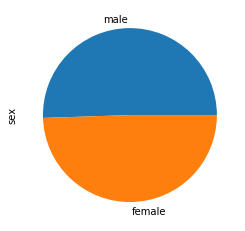

In [4]:
df.sex.value_counts()
print(df.sex.value_counts().plot(kind='pie'))

histogram
AxesSubplot(0.125,0.125;0.775x0.755)


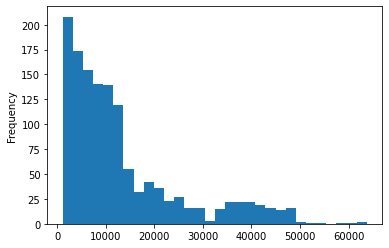

In [5]:
df.smoker.value_counts()
print('histogram')
print(df.charges.plot(kind='hist', bins=30))

In [8]:
px.histogram(df,x='charges', width=700,height=400,nbins=50,facet_col='smoker',facet_row='sex')

In [9]:
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [10]:
corr = df_dummies.corr()
corr

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


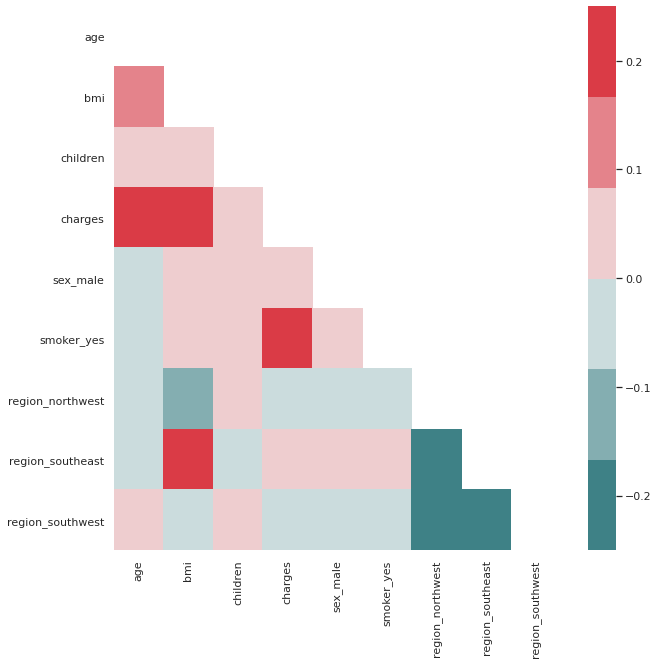

In [15]:
sns.set(style='white')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=1
plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(200, 10)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.25, vmin=-0.25)

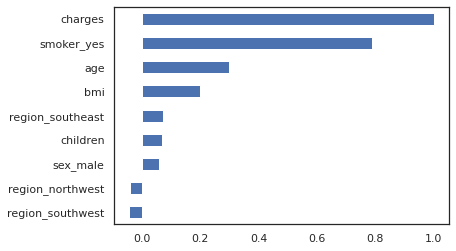

In [16]:
df_dummies.corr()['charges'].sort_values(ascending=False)
df_dummies.corr()['charges'].sort_values().plot(kind='barh')

In [55]:
#data without column 'charges' will make up x_train and x_test
#data from column 'charhes' will make up y_train and y_test

col_charges_y = df_dummies['charges']
col_without_charges_x = df_dummies.drop(columns='charges')
x_train, x_test, y_train, y_test = train_test_split(col_without_charges_x, col_charges_y)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

r2_basic = regressor.score(x_test, y_test)
print(f"wynik r2: {r2_basic:.4f}")

wynik r2: 0.7361


In [20]:
y_pred = regressor.predict(x_test)
y_pred[:10]

array([27106.0118925 ,  5566.94814481,  8785.55474988,  8367.25218919,
        1739.65651816, 11094.87187394, 12800.71416541,  2826.83358997,
       11097.22837759, 24248.97805605])

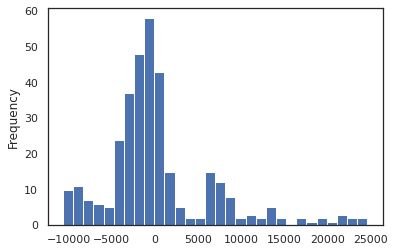

In [21]:
y_true = y_test.copy()
predictions = pd.DataFrame(data={'y_true': y_true, 'y_pred': y_pred})
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions.head()
predictions['error'].plot(kind='hist', bins=30)

In [63]:
mae_basic = mean_absolute_error(y_true, y_pred)
print(f"MAE= {mae_basic:.2f}")

MAE= 4272.79


In [24]:
x_train_ols = sm.add_constant(x_train.values)
ols = sm.OLS(endog=y_train, exog=x_train_ols).fit()
predictors = ['const'] + list(x_train.columns)
summary = ols.summary2(xname=predictors) #tu
print(summary)

                       Results: Ordinary least squares
Model:                  OLS                 Adj. R-squared:        0.756     
Dependent Variable:     charges             AIC:                   20294.2052
Date:                   2020-12-02 08:43    BIC:                   20338.4020
No. Observations:       1003                Log-Likelihood:        -10138.   
Df Model:               8                   F-statistic:           388.8     
Df Residuals:           994                 Prob (F-statistic):    7.26e-300 
R-squared:              0.758               Scale:                 3.5559e+07
-----------------------------------------------------------------------------
                    Coef.     Std.Err.    t     P>|t|     [0.025     0.975]  
-----------------------------------------------------------------------------
const            -11992.1389 1123.6734 -10.6723 0.0000 -14197.1832 -9787.0946
age                 258.0598   13.3705  19.3006 0.0000    231.8221   284.2975
bmi      

In [87]:
#col P>|t| określa wielkość dysonansu między daną kolumną a jej wartością wyjściową
#najmniej na wynik końcowy wpływają kolumny z największą wartością P>|t| (wartość akceptowalna do 0.05)
to_drop = summary.tables[1]
print(to_drop[to_drop['P>|t|']>0.05])

df_dummies_without_to_drop = df_dummies.drop(columns=['sex_male','region_northwest','region_southeast'])
df_dummies_without_to_drop.head()


                       Coef.    Std.Err.  ...       [0.025      0.975]
sex_male         -259.251475  379.006371  ... -1002.995928  484.492978
region_northwest -317.757959  541.419834  ... -1380.215029  744.699111
region_southeast -795.748234  549.496289  ... -1874.054164  282.557697

[3 rows x 6 columns]


,age,bmi,children,charges,smoker_yes,region_southwest
0,19,27.900,0,16884.92400,1,1
1,18,33.770,1,1725.55230,0,0
2,28,33.000,3,4449.46200,0,0
3,33,22.705,0,21984.47061,0,0
4,32,28.880,0,3866.85520,0,0


In [50]:
col_charges_y = df_dummies_without_to_drop['charges']
col_without_charges_x = df_dummies_without_to_drop.drop(columns='charges')
x_train, x_test, y_train, y_test = train_test_split(col_without_charges_x, col_charges_y)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

r2_ols_based = regressor.score(x_test, y_test)
print(f"wynik r2: {r2_ols_based:.4f}")

wynik r2: 0.7648


In [62]:
mae_ols_based = mean_absolute_error(y_true, y_pred)
print(f"MAE= {mae_ols_based:.2f}")

MAE= 4272.79


In [86]:
#RESULTS COMPARISION
print(f'R2 value basic: {r2_basic:.4f} and by ols algorithm: {r2_ols_based:.4f}')
print(f'MEAN error basic: {mae_basic:.4f} and by ols algorithm: {mae_ols_based:.4f}')
#memory usage
size_before = df_dummies.memory_usage(deep=True).sum()
size_after = df_dummies_without_to_drop.memory_usage(deep=True).sum()
print(f'We economize: {abs((size_after-size_before)/(size_before)*100):.4f} % with memory_usage')
#the size of an object in bytes with sys library
size_before = sys.getsizeof(df_dummies)
size_after = sys.getsizeof(df_dummies_without_to_drop)
print(f'We economize: {abs((size_after-size_before)/(size_before)*100):.4f} % with sys')

R2 value basic: 0.7361 and by ols algorithm: 0.7648
MEAN error basic: 4272.7887 and by ols algorithm: 4272.7887
We economize: 8.0872 % with memory_usage
We economize: 8.0833 % with sys
